In [1]:
import re
import os
import itertools
import networkx as nx
import time
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pokemon_dir = "./pokemon_files_raw/"
pokemon_names = sorted(os.listdir("pokemon_files_raw/"))

## Making dict full of pokemon and their locations in the games

In [3]:
all_occurances = {}
location_list = set()
version_list = set()

for pokemon in pokemon_names:
    poke_path = pokemon_dir + pokemon
    poke_file = open(poke_path, encoding='utf-8').read()
    pokemon_text = re.findall(r"(?<=Game locations===)(.*)(?=In side games)", poke_file)
    poke_VandA = re.findall(r"(v=)(.*?)\\\\n", str(pokemon_text))
    places = {}
    for x in poke_VandA :
        v1 = re.findall(r".+?(?=\|)", str(x[1]))
        if len(v1) > 1:
            v1 = v1[0]
        else:
            v1 = re.findall(r".+?(?=\})", str(x[1]))
            v1 = v1[0]
        if "v2" in str(x[1]):
            v2 = re.findall(r"(v2=)(.*?)(\|)", str(x[1]))
            if len(v2) > 0 and len(v2[0]) > 1:
                v2 = v2[0][1]
            else:
                v2 = re.findall(r"(v2=)(.*?)(\})", str(x[1]))
                v2 = v2[0][1]
        else:
            v2 = "!"
        loc = re.findall(r"\{{(.*?)\}", str(x[1]))
        for place in loc:
            if "{{" in place:
                continue
            if place in places:
                places[place].append(v1)
                if v2 != "!":
                    places[place].append(v2)
                    version_list.add(v2)
            else:
                places[place] = [v1]
                if v2 != "!":
                    places[place].append(v2)
                    version_list.add(v2)
            location_list.add(place)
            version_list.add(v1)
            
        loc = re.findall(r"(\[\[)(.*?)(\]\])", str(x[1]))
        for place in loc:
            if place[1] in places:
                places[place[1]].append(v1)
                if v2 != "!":
                    places[place[1]].append(v2)
                    version_list.add(v2)
            else:
                places[place[1]] = [v1]
                if v2 != "!":
                    places[place[1]].append(v2)
                    version_list.add(v2)
            location_list.add(place[1])
    all_occurances[pokemon] = places

In [18]:
all_locations = {}
for x in location_list:
    all_locations[x] = {}

myList = {}
myList['[19]Rattata'] = all_occurances['[19]Rattata']
myList['[16]Pidgey'] = all_occurances['[16]Pidgey']


for k, v in all_occurances.items():
    for location, version  in v.items():
        for t in version:
            if t in all_locations[location]:
                all_locations[location][t].append(k)
            else:
                all_locations[location][t] = [k]

## Making the graph

In [5]:
all_edges = []
for location, info in all_locations.items():
    for version, pokemons in info.items():
        # all pokemon pairs from the episode is a binomial of len(pokemons) and 2
        list_of_nodes_from_loc = list(itertools.combinations(sorted(pokemons), 2))
        all_edges += list_of_nodes_from_loc

In [6]:
G = nx.Graph()
G.add_nodes_from(pokemon_names)

for i, pokemon_edge in enumerate(all_edges):
    pokemon1 = pokemon_edge[0]
    pokemon2 = pokemon_edge[1]
    
    if G.has_edge(pokemon1, pokemon2):
        G[pokemon1][pokemon2]['weight'] += 1
    else:
        G.add_edge(pokemon1, pokemon2, weight=1)
    # print current status    
    if (i+1) % round(0.01 * len(all_edges)) == 0:
        clear_output(wait=True)
        current_percent = (i+1) / round(0.01 * len(all_edges))
        print(f"{current_percent}% done ({i+1} out of {len(all_edges)})")
    
clear_output(wait=True)
print("100% done.")

100% done.


In [7]:
print(f"Number of graph's nodes: {len(G.nodes)}")

Number of graph's nodes: 809


In [8]:
print(f"Number of graph's edges: {len(G.edges)}")

Number of graph's edges: 134385


In [9]:
print(f"Average node degree: {np.mean([x[1] for x in G.degree])}")

Average node degree: 332.2249690976514


In [10]:
pokemon_wo_edges = [x for x in G.nodes if G.degree(x) == 0]
print(f"Number of Pokemon without any connections: {len(pokemon_wo_edges)}")

Number of Pokemon without any connections: 8


In [11]:
sorted_by_degree_Desc = sorted(list(G.degree), key=lambda x: x[1], reverse=True)
sorted_by_degree_Desc

[('[113]Chansey', 600),
 ('[277]Swellow', 577),
 ('[596]Galvantula', 572),
 ('[89]Muk', 572),
 ('[105]Marowak', 571),
 ('[262]Mightyena', 571),
 ('[202]Wobbuffet', 567),
 ('[15]Beedrill', 565),
 ('[356]Dusclops', 559),
 ('[112]Rhydon', 557),
 ('[125]Electabuzz', 556),
 ('[264]Linoone', 554),
 ('[375]Metang', 554),
 ('[85]Dodrio', 554),
 ('[600]Klang', 552),
 ('[423]Gastrodon', 548),
 ('[553]Krookodile', 548),
 ('[286]Breloom', 544),
 ("[83]Farfetch'd", 544),
 ('[189]Jumpluff', 543),
 ('[99]Kingler', 542),
 ('[130]Gyarados', 541),
 ('[12]Butterfree', 540),
 ('[67]Machoke', 539),
 ('[195]Quagsire', 538),
 ('[545]Scolipede', 538),
 ('[143]Snorlax', 536),
 ('[281]Kirlia', 536),
 ('[126]Magmar', 535),
 ('[226]Mantine', 533),
 ('[82]Magneton', 531),
 ('[55]Golduck', 528),
 ('[213]Shuckle', 527),
 ('[267]Beautifly', 527),
 ('[358]Chimecho', 527),
 ('[162]Furret', 526),
 ('[332]Cacturne', 526),
 ('[31]Nidoqueen', 522),
 ('[400]Bibarel', 522),
 ('[30]Nidorina', 521),
 ('[33]Nidorino', 521),
 ('

In [12]:
pikachu_neighbours = list(G.neighbors(sorted_by_degree_Desc[0][0]))
list(set(pokemon_names) - set(pikachu_neighbours))

['[421]Cherrim',
 '[724]Decidueye',
 '[672]Skiddo',
 '[755]Morelull',
 '[555]Darmanitan',
 '[698]Amaura',
 '[248]Tyranitar',
 '[806]Blacephalon',
 '[758]Salazzle',
 '[652]Chesnaught',
 '[741]Oricorio',
 '[688]Binacle',
 '[656]Froakie',
 '[568]Trubbish',
 '[532]Timburr',
 '[713]Avalugg',
 '[413]Wormadam',
 '[655]Delphox',
 '[669]Flabébé',
 '[151]Mew',
 '[770]Palossand',
 '[744]Rockruff',
 '[644]Zekrom',
 '[753]Fomantis',
 '[379]Registeel',
 '[595]Joltik',
 '[661]Fletchling',
 '[745]Lycanroc',
 '[798]Kartana',
 '[647]Keldeo',
 '[800]Necrozma',
 '[789]Cosmog',
 '[776]Turtonator',
 '[779]Bruxish',
 '[491]Darkrai',
 '[769]Sandygast',
 '[485]Heatran',
 '[807]Zeraora',
 '[244]Entei',
 '[664]Scatterbug',
 '[251]Celebi',
 '[785]Tapu Koko',
 '[803]Poipole',
 '[522]Blitzle',
 '[796]Xurkitree',
 '[730]Primarina',
 '[509]Purrloin',
 '[243]Raikou',
 '[727]Incineroar',
 '[483]Dialga',
 '[768]Golisopod',
 '[680]Doublade',
 '[653]Fennekin',
 '[736]Grubbin',
 '[795]Pheromosa',
 '[579]Reuniclus',
 '[308]

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


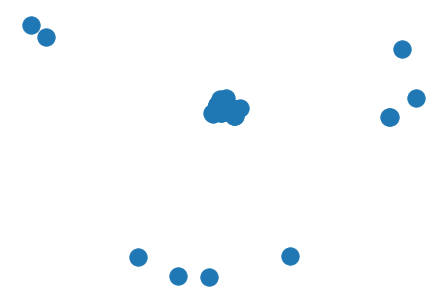

In [13]:
nx.draw(G)